https://github.com/srivatsan88/End-to-End-Time-Series/blob/master/TimeSeries_Stationary_Test.ipynb
https://www.youtube.com/watch?v=7WBDi4MvRKY&list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK&index=28

In [1]:
#read the data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')
df.head()

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561


In [2]:
#parse the dates
from datetime import datetime
df['Quarter'] = df['Quarter'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


<Axes: title={'center': 'Amazon Revenue'}, xlabel='Quarter'>

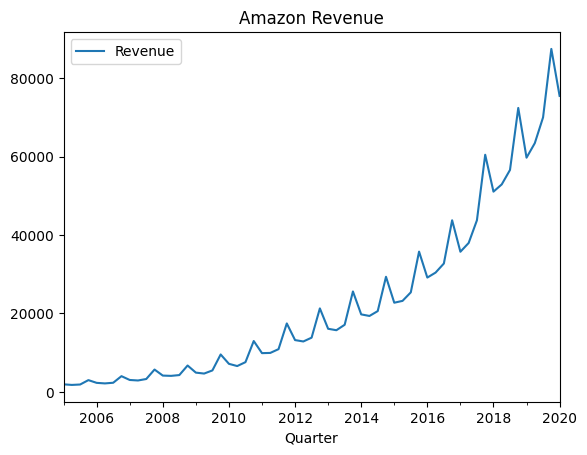

In [3]:
df.plot(x='Quarter', y='Revenue', title='Amazon Revenue')

In [4]:
import plotly_express as px
fig=px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## RUNNING STATISTICAL TEST

### Augmented dickey fuller test

Null hypothesis:  series  a unit root - non stationary

alternate: series doesn't have a unit root- stationary

In [5]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Revenue'])

In [6]:
result

(-2.44483603819723,
 0.1294794312183885,
 10,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 753.7964652720992)

In [7]:
print("test statistic:" , result[0])
print("p value:" , result[1])
print("critical values:" , result[4])

test statistic: -2.44483603819723
p value: 0.1294794312183885
critical values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}


the test statistics is within the 5 percent, fail to reject null hypothesis, so series is not stationary 

### KPSS TEST
observable time series is stationary around a deterministic trend( the residual is stationary)

Null hypothesis: time series is stationary around a deterministic trend

Hypothesis hypothesis: time series is not stationary around a deterministic trend


parameters: xarray_like, 1d
The data series to test.

regressionstr{“c”, “ct”}
The null hypothesis for the KPSS test.

“c” : The data is stationary around a constant (default).

“ct” : The data is stationary around a trend.

In [8]:
from statsmodels.tsa.stattools import kpss
stats, p_val, lags, critical_val=kpss(df['Revenue'], 'ct')

C:\Users\soundarya.sarathi\AppData\Local\Temp\ipykernel_29988\3553438923.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [9]:
print("test statistic:" , stats)
print("p value:" , p_val)
print("lags used:" , lags)
print("critical values:" , critical_val)

test statistic: 0.30665545975169417
p value: 0.01
lags used: 4
critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [10]:
#if p value is less than 0.05, reject the null hypothesis
if p_val<0.05:
  print("series is not stationary")

series is not stationary


ADF Test is better if you suspect the series is non-stationary, and you want to explicitly test for the presence of a unit root.
KPSS Test is better if you think the series is stationary and you want to explicitly confirm that hypothesis.

### How to make a time series stationary?

In [11]:
#run all the differences and see where the time series becomes stationary
#first difference: yt=yt-y(t-1) , second difference: yt=(yt-t-1)-(yt-1-yt-2)
from pmdarima.arima import ndiffs


In [14]:
ndiffs(df['Revenue'], alpha=0.05,test='kpss', max_d=4)

2

we need to apply 2 differences in order to make the timeseries stationary

Here, .diff() calculates the difference between consecutive values in the Revenue column. You perform this twice to remove any trend or seasonality components and make the series stationary.



In [15]:
df['Revenue_diff_1'] = df['Revenue'].diff()

apply adf fuller 

Ho= ts not stationary

H1- ts stationary

In [16]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Revenue_diff_1'].dropna())
result

(-4.835839517045706,
 4.642045037472491e-05,
 11,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 739.4498746481416)

we see p value is very less so we reject H0, ts stationary under adf fuller

kpss

H0= stationary

H1=  non stationary

In [20]:
from statsmodels.tsa.stattools import kpss
stats, p_val, lags, critical_val=kpss(df['Revenue_diff_1'].dropna(), 'ct')
stats, critical_val

(0.16375991075229296, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

statistic is greater than 5 percent, so reject H0.

Second order differencing

In [19]:
df['Revenue_diff_2'] = df['Revenue_diff_1'].diff()

apply kpss

In [21]:
from statsmodels.tsa.stattools import kpss
stats, p_val, lags, critical_val=kpss(df['Revenue_diff_2'].dropna(), 'ct')
stats, critical_val

C:\Users\soundarya.sarathi\AppData\Local\Temp\ipykernel_29988\438972897.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(0.09620654948521237, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Do not reject Ho.

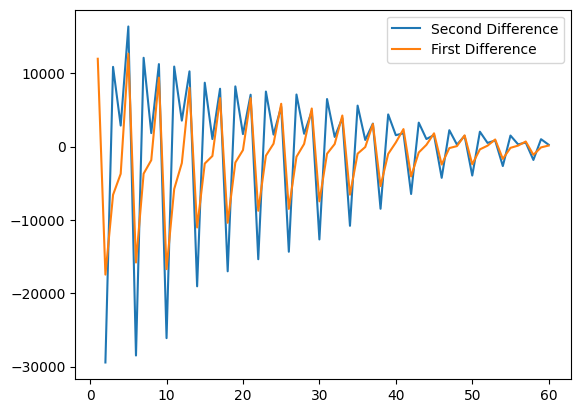

In [24]:
import matplotlib.pyplot as plt

df['Revenue_diff_2'].plot(label='Second Difference')
df['Revenue_diff_1'].plot(label='First Difference')
plt.legend()
plt.show()

## New York City Energy consumption dataset

In [26]:
import pandas as pd
df=pd.read_csv("nyc_energy_consumption.csv")
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [27]:
df.isnull().sum()

timeStamp      0
demand        81
precip       230
temp         186
dtype: int64

data cannot have null values

fill with the previous value

In [29]:
df["demand"]=df["demand"].ffill()
df["temp"]=df["temp"].ffill()

In [30]:
from datetime import datetime
df["timeStamp"]=pd.to_datetime(df["timeStamp"])
df["timeStamp"]=df["timeStamp"].apply(lambda x: datetime.strftime(x, "%Y-%m-%d"))

In [31]:
df.set_index("timeStamp", inplace=True)

<Axes: title={'center': 'NYC Temperature'}, xlabel='timeStamp'>

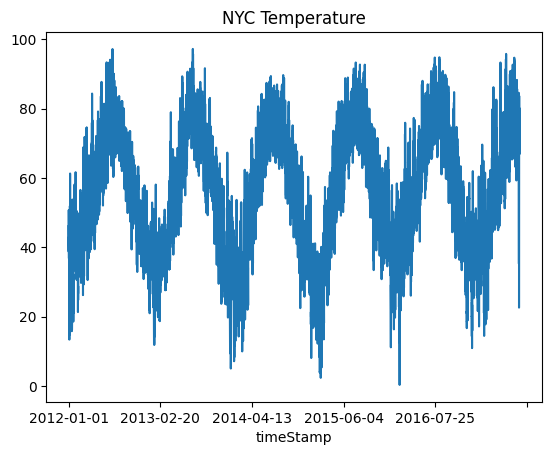

In [32]:
df["temp"].plot(title="NYC Temperature")    

series is not stationary since there is seasonality

yt=yt-yt-m

m=frequency when the datapoints repeat themselves

here it is repeating every year so 24 datapoints a day so 24*365 = 8760 days


C:\Users\soundarya.sarathi\AppData\Local\Temp\ipykernel_29988\4029621895.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: title={'center': 'NYC Temperature Lag'}, xlabel='timeStamp'>

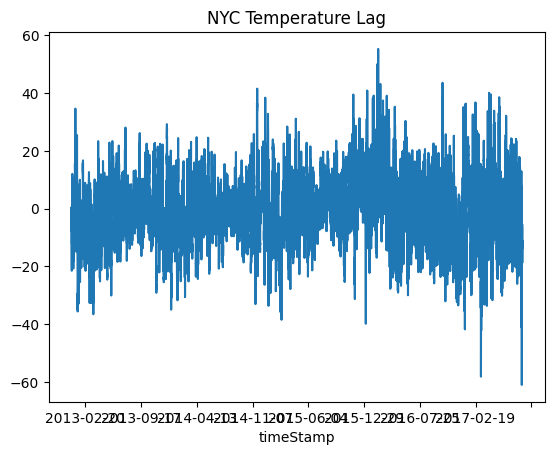

In [33]:
lag_temp=df["temp"].rolling(window=8760).apply(lambda x: x[8759]-x[0])
lag_temp.plot(title="NYC Temperature Lag")

In [34]:
seasonal_lag = 8760  # For monthly data with yearly seasonality

# Apply seasonal differencingi
df['temp_seasonal_diff'] = df['temp'].diff(seasonal_lag)

<Axes: title={'center': 'NYC Temperature Seasonal Difference'}, xlabel='timeStamp'>

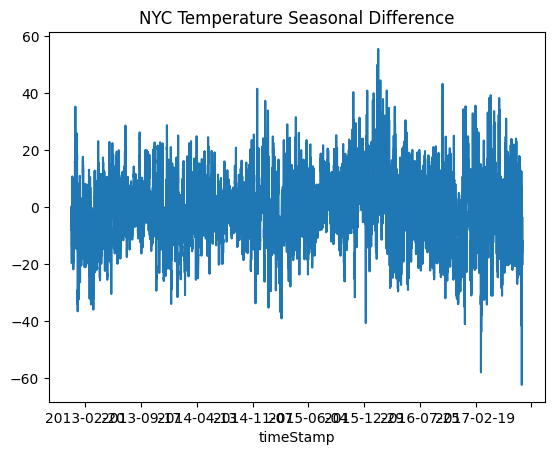

In [35]:
df['temp_seasonal_diff'].plot(title="NYC Temperature Seasonal Difference")

In [40]:
#kpss
from statsmodels.tsa.stattools import kpss
stats, p_val, lags, critical_val=kpss(df['temp_seasonal_diff'].dropna(), 'c')
stats, critical_val

C:\Users\soundarya.sarathi\AppData\Local\Temp\ipykernel_29988\2154085145.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(1.2003893380454216, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

reject H0 as 1.2 >>0.463

series is not stationary

Now that seasonality has been removed, we can apply the pndarima to find which test is appropriate